In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

In [36]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_two=[]
lat=[]
lng=[]
max_t=[]
hum=[]
cld=[]
wd_spd=[]
ctry=[]
date=[]

count_one=0
set_one=1

print(f'Beginning Data Retrieval')
print(f'--------------------')
for city in cities:
    
# Build query URL and request your results in Celsius
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_t.append(weather_json['main']['temp_max'])
        hum.append(weather_json['main']['humidity'])
        cld.append(weather_json['clouds']['all'])
        wd_spd.append(weather_json['wind']['speed'])
        ctry.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f'Processing Record {count_one} of Set {set_one} | {city}')  
    except:
        print(f'City not found. Skipping...')

print(f'--------------------')
print(f'Data Retreival Complete')
print(f'--------------------')
# lat = weather_json['coord']['lat']
# lng = weather_json['coord']['lon']
# max_t = weather_json['main']['temp_max']
# hum = weather_json['main']['humidity']
# cld = weather_json['clouds']['all']
# wd_spd = weather_json['wind']['speed']
# ctry = weather_json['sys']['country']
# date = weather_json['dt']
# print(ctry)
# pprint(weather_json)

Beginning Data Retrieval
--------------------
Processing Record 1 of Set 1 | nantucket
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | badajoz
Processing Record 4 of Set 1 | boshnyakovo
Processing Record 5 of Set 1 | aljezur
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kardla
City not found. Skipping...
Processing Record 11 of Set 1 | lagos
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | ojinaga
Processing Record 16 of Set 1 | taoudenni
City not found. Skipping...
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | matamo

Processing Record 36 of Set 4 | yokadouma
Processing Record 37 of Set 4 | tawang
Processing Record 38 of Set 4 | aquiraz
Processing Record 39 of Set 4 | kihei
Processing Record 40 of Set 4 | mayo
Processing Record 41 of Set 4 | cururupu
Processing Record 42 of Set 4 | calvinia
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | chadiza
City not found. Skipping...
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | hudson bay
Processing Record 48 of Set 4 | kasongo-lunda
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | sciacca
City not found. Skipping...
Processing Record 2 of Set 5 | abu samrah
City not found. Skipping...
Processing Record 3 of Set 5 | kabare
Processing Record 4 of Set 5 | nakuru
Processing Record 5 of Set 5 | south lake tahoe
Processing Record 6 of Set 5 | liverpool
Pro

Processing Record 22 of Set 8 | sitka
Processing Record 23 of Set 8 | zhuanghe
Processing Record 24 of Set 8 | zonguldak
Processing Record 25 of Set 8 | evensk
Processing Record 26 of Set 8 | acapulco
Processing Record 27 of Set 8 | awbari
Processing Record 28 of Set 8 | garissa
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | amahai
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | yazykovo
Processing Record 33 of Set 8 | banda aceh
Processing Record 34 of Set 8 | bundu
Processing Record 35 of Set 8 | luena
Processing Record 36 of Set 8 | longyearbyen
Processing Record 37 of Set 8 | tigil
Processing Record 38 of Set 8 | zhurivka
City not found. Skipping...
Processing Record 39 of Set 8 | ribeira grande
Processing Record 40 of Set 8 | hirara
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | kungurtug
Processing Record 43 of Set 8 | ormara
Processing Record 44 of Set 8 | pervomayskoye
Processing R

In [37]:
city_data ={'City':city_two,
            'Lat':lat,
            'Lng':lng,
            'Max Temp':max_t,
            'Humidity':hum,
            'Cloudiness':cld,
            'Wind Speed':wd_spd,
            'Country':ctry,
            'Date':date}

In [38]:
raw_df=pd.DataFrame(city_data)
raw_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [39]:
raw_df.to_csv(output_data_file)

In [40]:
raw_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nantucket,41.28,-70.10,77.00,83,75,12.75,US,1596143708
1,port alfred,-33.59,26.89,57.15,85,30,8.01,ZA,1596143165
2,badajoz,38.67,-6.17,88.00,32,0,5.01,ES,1596143709
3,boshnyakovo,49.63,142.17,63.99,98,99,5.12,RU,1596143709
4,aljezur,37.32,-8.80,73.00,85,3,7.29,PT,1596143709


In [41]:
raw_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.932325,16.113081,69.987749,69.916974,47.573801,7.690074,1.596144e+09
std,32.889862,91.708410,14.926416,21.660686,39.083127,5.090171,2.820494e+02
min,-54.800000,-175.200000,30.990000,5.000000,0.000000,0.400000,1.596143e+09
25%,-6.102500,-66.770000,57.967500,56.000000,5.000000,4.000000,1.596143e+09
50%,24.940000,20.310000,72.080000,75.000000,40.000000,6.930000,1.596144e+09
75%,47.475000,97.387500,80.555000,87.000000,90.000000,10.290000,1.596144e+09
max,78.220000,179.320000,114.800000,100.000000,100.000000,45.430000,1.596144e+09


In [62]:
lat=raw_df['Lat']
temp=raw_df['Max Temp']
hum=raw_df['Humidity']
cldy=raw_df['Cloudiness']
wd_spd=raw_df['Wind Speed']

parsed_df=pd.DataFrame({'Lat':lat,
                        'Max Temp':temp,
                        'Humidity':hum,
                        'Cloudiness':cldy,
                        'Wind Speed':wd_spd})

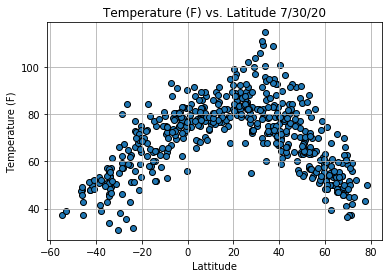

In [53]:
plt.scatter(lat,temp,marker='o',alpha=1,edgecolors='black')
plt.title('Temperature (F) vs. Latitude 7/30/20')
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('output_data/temp_lat.png')
plt.show()

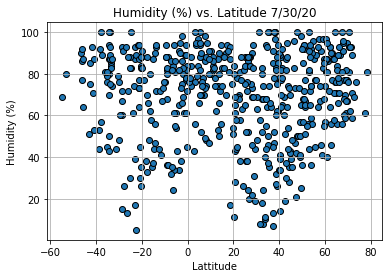

In [54]:
plt.scatter(lat,hum,marker='o',alpha=1,edgecolors='black')
plt.title('Humidity (%) vs. Latitude 7/30/20')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/humidity_lat.png')
plt.show()

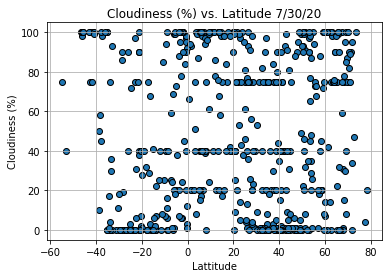

In [55]:
plt.scatter(lat,cldy,marker='o',alpha=1,edgecolors='black')
plt.title('Cloudiness (%) vs. Latitude 7/30/20')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/cloudy_lat.png')
plt.show()

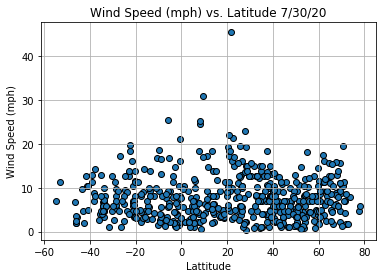

In [56]:
plt.scatter(lat,wd_spd,marker='o',alpha=1,edgecolors='black')
plt.title('Wind Speed (mph) vs. Latitude 7/30/20')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/wind_lat.png')
plt.show()

In [65]:
city_so=parsed_df[parsed_df['Lat']<0]
city_no=parsed_df[parsed_df['Lat']>0]

In [128]:
def linear_regress_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker='o',alpha=1,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),max(y_values)-10),fontsize=15,color="red")
    print('The r-squared value is ' + str(rvalue**2))

The r-squared value is 0.5896548949207849


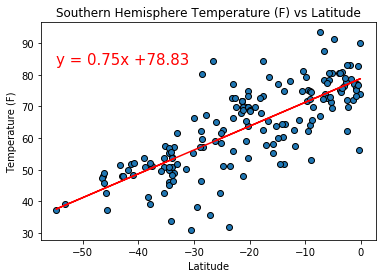

In [130]:
linear_regress_plot(city_so['Lat'],city_so['Max Temp'])
plt.title('Southern Hemisphere Temperature (F) vs Latitude')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output_data/temp_lat_so.png')
plt.show()

The r-squared value is 0.44992708897012645


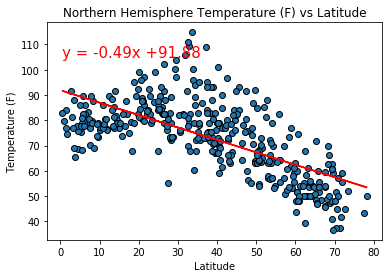

In [119]:
linear_regress_plot(city_no['Lat'],city_no['Max Temp'])
plt.title('Northern Hemisphere Temperature (F) vs Latitude')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output_data/temp_lat_no.png')
plt.show()

The r-squared value is 0.00726224257432419


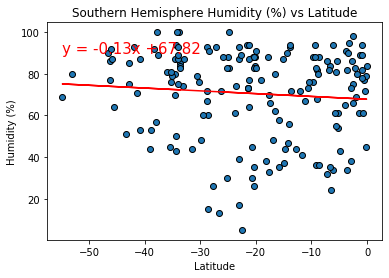

In [120]:
linear_regress_plot(city_so['Lat'],city_so['Humidity'])
plt.title('Southern Hemisphere Humidity (%) vs Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/hum_lat_so.png')
plt.show()

The r-squared value is 0.0009070459418372729


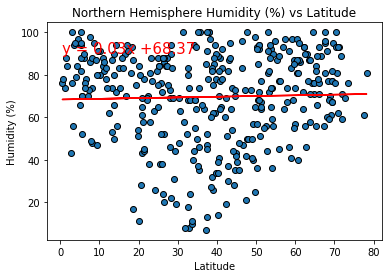

In [121]:
linear_regress_plot(city_no['Lat'],city_no['Humidity'])
plt.title('Northern Hemisphere Humidity (%) vs Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/hum_lat_no.png')
plt.show()

The r-squared value is 0.0026829952189705436


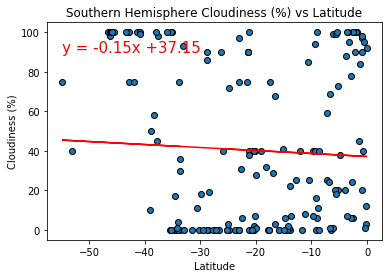

In [122]:
linear_regress_plot(city_so['Lat'],city_so['Cloudiness'])
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/cloud_lat_so.png')
plt.show()

The r-squared value is 0.0005989966227898316


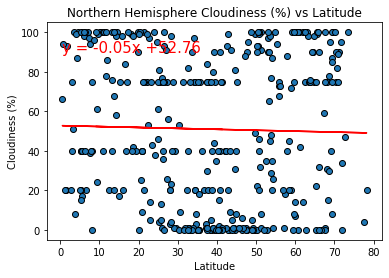

In [123]:
linear_regress_plot(city_no['Lat'],city_no['Cloudiness'])
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/cloud_lat_no.png')
plt.show()

The r-squared value is 0.0004604496020985496


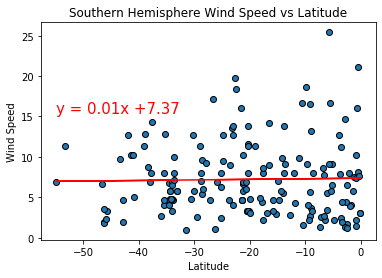

In [124]:
linear_regress_plot(city_so['Lat'],city_so['Wind Speed'])
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('output_data/wind_lat_so.png')
plt.show()

The r-squared value is 0.003362095182244326


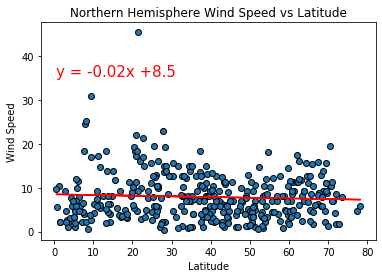

In [125]:
linear_regress_plot(city_no['Lat'],city_no['Wind Speed'])
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('output_data/wind_lat_no.png')
plt.show()